In [1]:
!pip install dowhy --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.6/192.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.8 MB/s eta 0:00:00


In [9]:
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
data = pd.read_csv("https://raw.githubusercontent.com/AkankshaSingal8/UAV_Tracking_Explainable/refs/heads/main/merged_dset.csv")
data.head()

,Image,corner_0_x,corner_0_y,corner_1_x,corner_1_y,corner_2_x,corner_2_y,corner_3_x,corner_3_y,area,angle_from_180,vx,vy,vz,omega_z
0,1_{1},244.169205,328.602478,234.663773,373.302673,190.005295,365.820526,200.219879,320.625854,2067.558476,282.005043,-0.545209,0.556323,-0.962746,0.551217
1,1_{2},245.349380,323.338013,234.615555,367.807251,189.901062,358.916748,201.562943,314.169098,2075.057770,283.570278,-0.525417,0.564068,-0.934628,0.539146
2,1_{3},247.017273,317.527374,234.862045,361.913330,190.342285,351.158081,203.166306,306.518738,2102.718986,285.315136,-0.489564,0.563228,-0.906020,0.525603
3,1_{4},247.017273,317.527374,234.862045,361.913330,190.342285,351.158081,203.166306,306.518738,2102.718986,285.315136,-0.489564,0.563228,-0.906020,0.525603
4,1_{5},248.525940,313.486206,235.355316,357.914337,191.035065,345.874908,204.680862,301.493683,2118.589275,286.512343,-0.469736,0.559267,-0.887602,0.516885


In [42]:
print(data['vy'].min())
print(data['vy'].max())

-0.8696004152297974
0.5640678


In [30]:
all_outcomes = ["vx", "vy", "vz", "omega_z"]
common_causes = ["corner_0_x", "corner_0_y", "corner_1_x", "corner_1_y", "corner_2_x", "corner_2_y", "corner_3_x", "corner_3_y", "area", "angle_from_180"]
results = {}

for outcome in all_outcomes:
    for treatment in common_causes:
        print(f"Running model for Outcome: {outcome}, Treatment: {treatment}")
        adjusted_common_causes = [c for c in common_causes if c != treatment]

        try:
            model = CausalModel(
                data=data,
                treatment=treatment,
                outcome=outcome,
                common_causes=adjusted_common_causes
            )

            identified_estimand = model.identify_effect(
                proceed_when_unidentifiable=True,
                method_name="maximal-adjustment"
            )

            estimate = model.estimate_effect(
                identified_estimand,
                method_name="backdoor.linear_regression",
                test_significance=True
            )

            refute_results = model.refute_estimate(
                identified_estimand,
                estimate,
                method_name="random_common_cause"
            )

            res_placebo = model.refute_estimate(
                identified_estimand,
                estimate,
                method_name="placebo_treatment_refuter",
                placebo_type="permute"
            )

            res_subset = model.refute_estimate(
                identified_estimand,
                estimate,
                method_name="data_subset_refuter",
                subset_fraction=0.9
            )

            # Store results
            results[(outcome, treatment)] = {
                "estimate": estimate,
                "refute_random": refute_results,
                "refute_placebo": res_placebo,
                "refute_subset": res_subset
            }

        except Exception as e:
            print(f"Failed for Outcome: {outcome}, Treatment: {treatment}. Error: {e}")
            results[(outcome, treatment)] = {
                "error": str(e)
            }

Running model for Outcome: vx, Treatment: corner_0_x


Running model for Outcome: vx, Treatment: corner_0_y


Running model for Outcome: vx, Treatment: corner_1_x


Running model for Outcome: vx, Treatment: corner_1_y


Running model for Outcome: vx, Treatment: corner_2_x


Running model for Outcome: vx, Treatment: corner_2_y


Running model for Outcome: vx, Treatment: corner_3_x


Running model for Outcome: vx, Treatment: corner_3_y


Running model for Outcome: vx, Treatment: area


Running model for Outcome: vx, Treatment: angle_from_180


Running model for Outcome: vy, Treatment: corner_0_x


Running model for Outcome: vy, Treatment: corner_0_y


Running model for Outcome: vy, Treatment: corner_1_x


Running model for Outcome: vy, Treatment: corner_1_y


Running model for Outcome: vy, Treatment: corner_2_x


Running model for Outcome: vy, Treatment: corner_2_y


Running model for Outcome: vy, Treatment: corner_3_x


Running model for Outcome: vy, Treatment: corner_3_y


Running model for Outcome: vy, Treatment: area


Running model for Outcome: vy, Treatment: angle_from_180


Running model for Outcome: vz, Treatment: corner_0_x


Running model for Outcome: vz, Treatment: corner_0_y


Running model for Outcome: vz, Treatment: corner_1_x


Running model for Outcome: vz, Treatment: corner_1_y


Running model for Outcome: vz, Treatment: corner_2_x


Running model for Outcome: vz, Treatment: corner_2_y


Running model for Outcome: vz, Treatment: corner_3_x


Running model for Outcome: vz, Treatment: corner_3_y


Running model for Outcome: vz, Treatment: area


Running model for Outcome: vz, Treatment: angle_from_180


Running model for Outcome: omega_z, Treatment: corner_0_x


Running model for Outcome: omega_z, Treatment: corner_0_y


Running model for Outcome: omega_z, Treatment: corner_1_x


Running model for Outcome: omega_z, Treatment: corner_1_y


Running model for Outcome: omega_z, Treatment: corner_2_x


Running model for Outcome: omega_z, Treatment: corner_2_y


Running model for Outcome: omega_z, Treatment: corner_3_x


Running model for Outcome: omega_z, Treatment: corner_3_y


Running model for Outcome: omega_z, Treatment: area


Running model for Outcome: omega_z, Treatment: angle_from_180


In [32]:
# save results in file
import pickle
with open('results.pkl', 'wb') as f:
    pickle.dump(results, f)

In [33]:
# load results from pickle file
import pickle
with open('results.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

In [41]:
print(loaded_results[('vy', 'corner_2_x')]['estimate'])
print(loaded_results[('vy', 'corner_2_x')]['refute_random'])
print(loaded_results[('vy', 'corner_2_x')]['refute_placebo'])
print(loaded_results[('vy', 'corner_2_x')]['refute_subset'])

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                         ↪
────────────(E[vy|corner_0_x,corner_3_y,corner_3_x,angle_from_180,area,corner_ ↪
d[corner₂ ₓ]                                                                   ↪

↪                                       
↪ 0_y,corner_2_y,corner_1_y,corner_1_x])
↪                                       
Estimand assumption 1, Unconfoundedness: If U→{corner_2_x} and U→vy then P(vy|corner_2_x,corner_0_x,corner_3_y,corner_3_x,angle_from_180,area,corner_0_y,corner_2_y,corner_1_y,corner_1_x,U) = P(vy|corner_2_x,corner_0_x,corner_3_y,corner_3_x,angle_from_180,area,corner_0_y,corner_2_y,corner_1_y,corner_1_x)

## Realized estimand
b: vy~corner_2_x+corner_0_x+corner_3_y+corner_3_x+angle_from_180+area+corner_0_y+corner_2_y+corner_1_y+corner_1_x
Target units: ate

## Estimate
Mean

In [ ]:
all_outcomes = ["vx", "vy", "vz", "omega_z"]
common_causes = ["corner_0_x", "corner_0_y", "corner_1_x", "corner_1_y", "corner_2_x", "corner_2_y", "corner_3_x", "corner_3_y", "area", "angle_from_180"]
outcome = "vx"
treatment = "corner_0_x"
common_causes.remove(treatment)

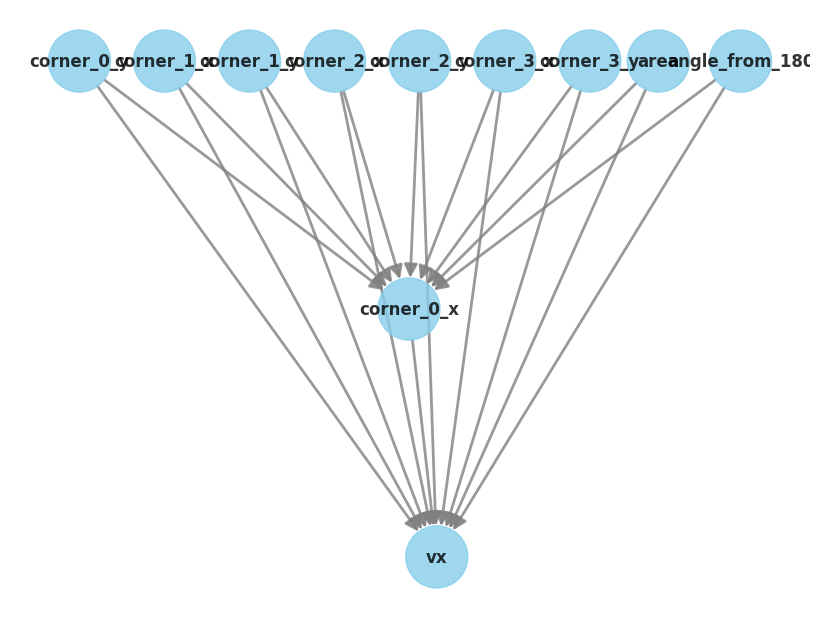

In [12]:
model=CausalModel(
        data=data,
        treatment=treatment,
        outcome=outcome,
        common_causes=common_causes
        )
model.view_model(layout="dot")

In [13]:
identified_estimand = model.identify_effect(
    proceed_when_unidentifiable=True,
    method_name="maximal-adjustment")

In [39]:
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",         # <— ask for the average treatment effect
    test_significance=True
)
print("Average Estimate is " + str(estimate.value))

Average Estimate is 5.816594813912168e-06


In [40]:
# Estimate the causal effect and compare it with Average Treatment Effect
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression", test_significance=True
)

print(estimate)
print("Causal Estimate is " + str(estimate.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                      ↪
─────────────────(E[ω_z|corner_0_x,corner_3_y,corner_3_x,area,corner_0_y,corne ↪
d[angle_from_180]                                                              ↪

↪                                         
↪ r_2_y,corner_1_y,corner_1_x,corner_2_x])
↪                                         
Estimand assumption 1, Unconfoundedness: If U→{angle_from_180} and U→omega_z then P(omega_z|angle_from_180,corner_0_x,corner_3_y,corner_3_x,area,corner_0_y,corner_2_y,corner_1_y,corner_1_x,corner_2_x,U) = P(omega_z|angle_from_180,corner_0_x,corner_3_y,corner_3_x,area,corner_0_y,corner_2_y,corner_1_y,corner_1_x,corner_2_x)

## Realized estimand
b: omega_z~angle_from_180+corner_0_x+corner_3_y+corner_3_x+area+corner_0_y+corner_2_y+corner_1_y+corner_1_x+corner_2_x
Targe

In [15]:
refute_results=model.refute_estimate(identified_estimand, estimate,
        method_name="random_common_cause")
print(refute_results)

Refute: Add a random common cause
Estimated effect:0.005030795808366406
New effect:0.0050308426182891705
p value:0.98



In [16]:
res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

Refute: Use a Placebo Treatment
Estimated effect:0.005030795808366406
New effect:-5.757536312018825e-07
p value:0.86



In [17]:
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

Refute: Use a subset of data
Estimated effect:0.005030795808366406
New effect:0.005041168483612102
p value:0.9199999999999999

